Built-in sklearn-KNN

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#đọc dữ liệu
train_dt = pd.read_csv("mnist_train.csv")

test_dt = pd.read_csv("mnist_test.csv")

#chia dữ liệu
X_train = train_dt.drop('label', axis=1)
y_train = train_dt['label']

X_test = test_dt.drop('label', axis=1)
y_test = test_dt['label']

#knn model
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

#prediction
y_pred = knn_model.predict(X_test)





In [25]:
#accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

#Các mẫu dự đoán sai
misclassified_samples = X_test[y_test != y_pred]

print(f'Number of misclassified samples: {len(misclassified_samples)}')

Accuracy: 0.9691
Number of misclassified samples: 309


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Import Datas

In [2]:
train_dt = pd.read_csv("mnist_train.csv")

In [3]:
test_dt = pd.read_csv("mnist_test.csv")

In [4]:
X_train = train_dt.iloc[:, 1:].values
y_train = train_dt.iloc[:, 0].values

X_test = test_dt.iloc[:, 1:].values
y_test = test_dt.iloc[:, 0].values

In [5]:
unique_classes = np.unique(y_train)

num_classes = len(unique_classes)

print(f"Số lượng class trong bộ dữ liệu: {num_classes}")

Số lượng class trong bộ dữ liệu: 10


In [6]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 784)
y_train shape (60000,)
X_test shape (10000, 784)
y_test shape (10000,)


In [12]:
y_train.dtype

dtype('int64')

In [ ]:
dir(np)

In [7]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

In [11]:
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


Standardization

In [165]:
from sklearn.preprocessing import StandardScaler
# z = (x - mean) / std
X_train = StandardScaler().fit_transform(X_train)

X_test = StandardScaler().fit_transform(X_test)

user-defined PCA

In [15]:
import numpy as np
 
def PCA_defined(X, num_components):
    
    #Step-1
    X_meaned = X - np.mean(X , axis = 0)
    
    #Step-2
    cov_mat = np.cov(X_meaned , rowvar = False)
    
    #Step-3
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    
    #Step-4
    sorted_index = np.argsort(eigen_values)[::-1]
    # sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    
    #Step-5
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    
    #Step-6
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose()
    
    return X_reduced

In [16]:
mat_reduced = PCA_defined(X_train, 2)
principal_df = pd.DataFrame(mat_reduced)
principal_df['label'] = train_dt['label']
# principal_df = pd.concat([principal_df , pd.DataFrame(target)] , axis = 1)

In [17]:
principal_df

,0,1,label
0,-123.932589,-312.674276,5
1,-1011.718385,-294.857042,0
2,51.849601,392.173162,4
3,799.127040,-607.197205,1
4,382.754928,730.542876,9
...,...,...,...
59995,99.621771,-293.475560,8
59996,-152.757809,-687.899717,3
59997,178.053447,160.078207,5
59998,-130.606072,-5.591926,6


Built-in sklearn-PCA

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)

PCA(n_components=2)

In [177]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
print(f"Total number of components used after PCA : {pca.n_components_}")

Total number of components used after PCA : 2


In [10]:
train_img = pca.transform(X_train)
test_img = pca.transform(X_test)

print(f"train_img shape : {train_img.shape}")
print(f"test_img shape : {test_img.shape}")

train_img shape : (60000, 2)
test_img shape : (10000, 2)


Built-in sklearn-MultinomialNB

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [12]:
model = MultinomialNB()

In [13]:
model.fit(X_train, y_train)

MultinomialNB()

In [14]:
y_pred = model.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [18]:
# Hiển thị kết quả
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.8365

Confusion Matrix:
 [[ 912    0    2    6    1    8   14    1   36    0]
 [   0 1061    5    9    0    2    6    0   51    1]
 [  15   11  858   24   10    3   33   11   66    1]
 [   4   11   34  851    1   21    7   14   40   27]
 [   2    2    6    0  732    0   25    1   38  176]
 [  23   11    6  107   18  590   17    6   78   36]
 [  17   13   17    1    7   25  860    0   18    0]
 [   1   21   11    5   19    0    1  861   40   69]
 [   6   26   13   54   14   27    8    9  777   40]
 [   6    7    3   10   66   10    0   17   27  863]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       980
           1       0.91      0.93      0.92      1135
           2       0.90      0.83      0.86      1032
           3       0.80      0.84      0.82      1010
           4       0.84      0.75      0.79       982
           5       0.86      0.66      0.75       892
           6       0.89     

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
model = KNeighborsClassifier(n_neighbors=1)

In [21]:
model.fit(train_img, y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
y_pred = model.predict(test_img)

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.3896


NAIVE BAYES

In [12]:
import os
import math
import time
from pathlib import Path
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA


class NaiveBayes:
    def __init__(self):
        self.train_datas, self.train_labels, self.test_datas, self.test_labels = (
            [],
            [],
            [],
            [],
        )
        self.prior, self.likelihoods, self.confusionMatrix = [], [], []
        self.start, self.end, self.time_use = 0, 0, 0
        self.features = 0
        self.train_records = 0
        self.test_records = 0
        self.num_classes = 0
        self.features = 0
        self.feature_values = 256

    def init(self, X_train, y_train, X_test, y_test):
        self.train_labels = y_train
        self.train_datas = X_train

        self.test_labels = y_test
        self.test_datas = X_test

        self.train_records, self.features = self.train_datas.shape
        self.test_records = len(self.test_datas)

        self.num_classes = len(np.unique(self.train_labels))

        self.confusionMatrix = [[0] * self.num_classes for _ in range(self.num_classes)]

    def run(self):
        self.start = time.time()
        self.train()
        self.predict_logarit()
        self.end = time.time()
        self.time_use = self.end - self.start
        print(self.time_use)

    def assess(self):
        self.CM()

    def train(self):
        # Priori Probability
        self.prior = [0] * self.num_classes

        for label in self.train_labels:
            self.prior[label] += 1

        for i in range(self.num_classes):
            self.prior[i] /= self.train_records
            # print(f"priori Probability of {i}: ", self.prior[i])

        # Posterior Probability
        self.likelihoods = [
            [[0] * self.feature_values for _ in range(self.features)]
            for _ in range(self.num_classes)
        ]
        # self.likelihoods = []
        # for _ in range(self.num_classes):
        #     class_likelihood = []
        #     for _ in range(self.features):
        #         feature_likelihood = [0] * self.feature_values
        #         class_likelihood.append(feature_likelihood)
        #     self.likelihoods.append(class_likelihood)
        class_counts = [0] * self.num_classes

        for i in range(self.train_records):
            label = self.train_labels[i]
            for j in range(self.features):
                index = int(self.train_datas[i][j])
                self.likelihoods[label][j][index] += 1
            class_counts[label] += 1

        for i in range(self.num_classes):
            for j in range(self.features):
                for k in range(self.feature_values):
                    if self.likelihoods[i][j][k] == 0:
                        self.likelihoods[i][j][k] = 1e-7
                    else:
                        self.likelihoods[i][j][k] /= class_counts[i]

    def predict_logarit(self):
        correct = 0
        sum_errors = 0

        for i in range(self.test_records):
            max_prob = -float("inf")
            max_class = -1

            for j in range(self.num_classes):
                prob = math.log(self.prior[j])
                for k in range(self.features):
                    index = int(self.test_datas[i][k])
                    prob += math.log(self.likelihoods[j][k][index])

                if prob > max_prob:
                    max_prob = prob
                    max_class = j

            self.confusionMatrix[self.test_labels[i]][max_class] += 1

            if max_class == self.test_labels[i]:
                correct += 1
            else:
                sum_errors += 1

        print()
        print("so ket qua sai:", sum_errors)
        print("so ket qua dung:", correct)
        accuracy = correct / (sum_errors + correct)
        print("Accuracy:", accuracy)

    def CM(self):
        print("Ground Truth = GT")
        print("Predicted Label = PL")
        self.printLine()
        print(f"total= {self.test_records:3d}|", end="")
        for i in range(self.num_classes):
            print(f" PL = {i:2d} |", end="")
        print()
        self.printLine()

        for i in range(self.num_classes):
            print(f" GT = {i:2d}    |", end="")
            for j in range(self.num_classes):
                print(f"   {self.confusionMatrix[i][j]:4d}  |", end="")
            print()
            self.printLine()

    def printLine(self):
        print("------------|", end="")
        for _ in range(self.num_classes):
            print("---------|", end="")
        print()
        
    def plot_accuracy_by_label(self):
        # Tính tỉ lệ đúng cho từng nhãn
        accuracy_by_label = np.diag(self.confusionMatrix) / np.sum(self.confusionMatrix, axis=1)

        # Vẽ biểu đồ
        plt.figure(figsize=(10, 6))
        bars = plt.bar(range(self.num_classes), accuracy_by_label, color='blue')
        plt.title('Accuracy by Label')
        plt.xlabel('Label')
        plt.ylabel('Accuracy')
        plt.ylim(0, 1)

        # Hiển thị giá trị trên đỉnh mỗi cột
        for bar, value in zip(bars, accuracy_by_label):
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{value:.2f}', ha='center', va='bottom')

        # Đặt tên cho các nhãn trục x
        plt.xticks(range(self.num_classes), [str(i) for i in range(self.num_classes)])
        
        plt.show()

In [18]:
test_dt = pd.read_csv("mnist_test.csv")
train_dt = pd.read_csv("mnist_train.csv")
X_train = train_dt.iloc[:, 1:].values
y_train = train_dt.iloc[:, 0].values

X_test = test_dt.iloc[:, 1:].values
y_test = test_dt.iloc[:, 0].values

Remove Attribute with constant value

In [10]:
def remove_constant_pixels(train_dt, test_dt):
    changing_train_dt = train_dt.loc[:]
    changing_test_dt = test_dt.loc[:]
    
    dropped_pixels = []
    for col in train_dt:
        if changing_train_dt[col].max() == 0 or changing_train_dt[col].min() == 255:
            changing_train_dt.drop(columns=[col], inplace=True)
            changing_test_dt.drop(columns=[col], inplace=True)
            dropped_pixels.append(col)
    # print("Constantly black pixels that have been dropped: {}".format(dropped_pixels_b))
    # print("\n Constantly white pixels that have been dropped: {}".format(dropped_pixels_b))

    print("Remaining pixels: {}".format(len(changing_train_dt.columns)))
    print("Pixels removed: {}".format(784-len(changing_train_dt.columns)))
    
    return changing_train_dt, changing_test_dt, dropped_pixels

In [19]:
X_train, X_test, dropped_pixels = remove_constant_pixels(train_dt, test_dt)

Remaining pixels: 718
Pixels removed: 66


In [20]:
X_train = X_train.iloc[:, 1:].values
X_test = X_test.iloc[:, 1:].values

In [21]:
NB = NaiveBayes()

In [22]:
NB.init(X_train, y_train, X_test, y_test)

In [23]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
X_test.shape

(10000, 717)

In [25]:
print("train_records: ", NB.train_records)
print("test_records: ", NB.test_records)
print("num_classes: ", NB.num_classes)
print("features: ", NB.features)
print("feature_values: ", NB.feature_values)

train_records:  60000
test_records:  10000
num_classes:  10
features:  717
feature_values:  256


In [35]:
# self.features = 0
# self.train_records = 0
# self.test_records = 0
# self.num_classes = 0
# self.features = 0
# self.feature_values = 256

In [32]:
NB.run()


so ket qua sai: 1607
so ket qua dung: 8393
Accuracy: 0.8393
131.6435990333557


In [33]:
NB.CM()

Ground Truth = GT
Predicted Label = PL
------------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
total= 10000| PL =  0 | PL =  1 | PL =  2 | PL =  3 | PL =  4 | PL =  5 | PL =  6 | PL =  7 | PL =  8 | PL =  9 |
------------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
 GT =  0    |    881  |      0  |      4  |      5  |      2  |     47  |     16  |      1  |     24  |      0  |
------------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
 GT =  1    |      0  |   1048  |     26  |      6  |      1  |     16  |      5  |      0  |     33  |      0  |
------------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|
 GT =  2    |     16  |      4  |    866  |     42  |     15  |      5  |     26  |      7  |     50  |      1  |
------------|---------|---------|---------|------

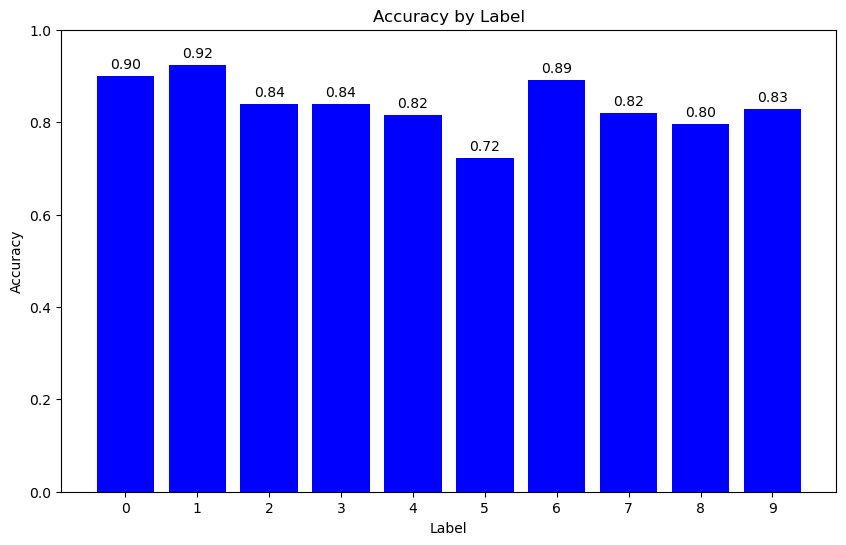

In [34]:
NB.plot_accuracy_by_label()

Test_NB_AccuracyPerLabel_Visualization

In [ ]:
accuracy_by_label = np.diag( NB.confusionMatrix) / np.sum(NB.confusionMatrix, axis=1)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
bars = plt.bar(range(NB.num_classes), accuracy_by_label, color='blue')
plt.title('Naive Bayes - Accuracy by Label')
plt.xlabel('Label')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Hiển thị giá trị trên đỉnh mỗi cột
for bar, value in zip(bars, accuracy_by_label):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{value:.2f}', ha='center', va='bottom')

# Đặt tên cho các nhãn trục x
plt.xticks(range(NB.num_classes), [str(i) for i in range(NB.num_classes)])

plt.show()

KNN_nonePCA_Visualization

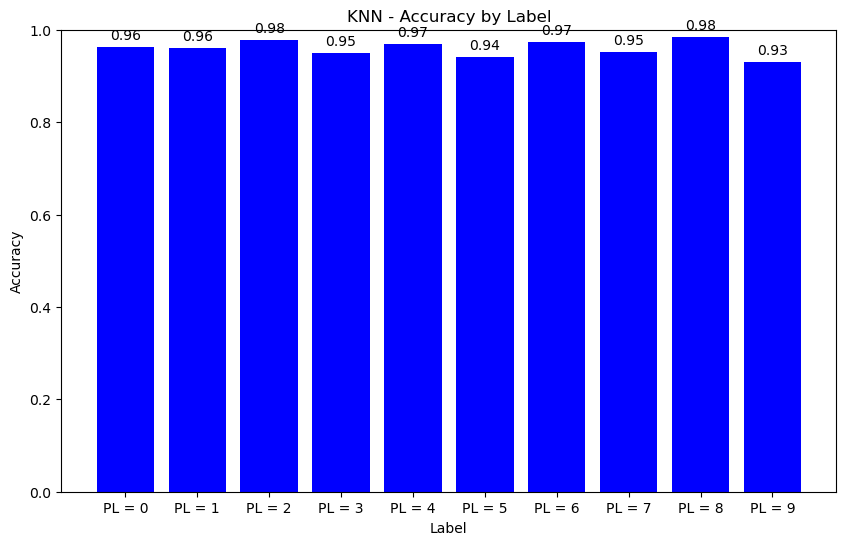

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Dữ liệu từ confusion matrix
confusion_matrix_data = [
    [972, 1, 1, 0, 0, 1, 2, 2, 1, 0],
    [0, 1132, 2, 1, 0, 0, 0, 0, 0, 0],
    [10, 6, 987, 4, 1, 1, 3, 18, 1, 1],
    [1, 1, 7, 954, 1, 23, 1, 8, 6, 8],
    [3, 4, 0, 0, 934, 0, 5, 3, 1, 32],
    [6, 1, 0, 18, 1, 846, 9, 1, 1, 9],
    [5, 3, 0, 0, 5, 3, 941, 0, 1, 0],
    [0, 25, 4, 0, 0, 0, 0, 987, 0, 12],
    [6, 1, 7, 22, 7, 23, 4, 3, 892, 9],
    [6, 4, 2, 5, 14, 3, 1, 16, 3, 955]
]

# Chuyển đổi thành NumPy array
confusion_matrix_data = np.array(confusion_matrix_data)

# Tính tỉ lệ đúng cho từng nhãn
accuracy_by_label = np.diag(confusion_matrix_data) / np.sum(confusion_matrix_data, axis=1)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
bars = plt.bar(range(10), accuracy_by_label, color='blue')
plt.title('KNN - Accuracy by Label')
plt.xlabel('Label')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Hiển thị giá trị trên đỉnh mỗi cột
for i, value in enumerate(accuracy_by_label):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

# Đặt tên cho các nhãn trục x
plt.xticks(range(10), [f'PL = {i}' for i in range(10)])
plt.show()


KNN


In [39]:
import numpy as np
from scipy.stats import mode


class KNearestNeighbors:
    def __init__(self):
        self.train_datas, self.train_labels, self.test_datas, self.test_labels = (
            [],
            [],
            [],
            [],
        )
        self.start, self.end, self.time_use = 0, 0, 0
        self.features = 0
        self.train_records = 0
        self.test_records = 0
        self.num_classes = 0
        self.features = 0
        self.op_labels = []
        
        # self.feature_values = 256

    def init(self, X_train, y_train, X_test, y_test):
        self.train_labels = y_train
        self.train_datas = X_train

        self.test_labels = y_test
        self.test_datas = X_test

        self.train_records, self.features = self.train_datas.shape
        self.test_records = len(self.test_datas)

        self.num_classes = len(np.unique(self.train_labels))

        self.confusionMatrix = [[0] * self.num_classes for _ in range(self.num_classes)]

    def eucledianDistance(self, p1, p2):
        dist = np.sqrt(np.sum((p1 - p2)**2))
        return dist

    def predict(self, k, num_samples):
        self.test_records = num_samples
        for i in range(self.test_records):
            distances = np.array([(j, self.eucledianDistance(self.train_datas[j], self.test_datas[i]))
                                  for j in range(self.train_records)])
            
            sorted_indices = np.argsort(distances[:, 1])
            
            neighbors = sorted_indices[:k]

            predicted_label = mode(self.train_labels[neighbors]).mode
            # print("GT - PL: ", self.test_labels[i], predicted_label)
            self.op_labels.append(predicted_label)

        return self.op_labels
    
    def CM(self, k):
        labels = len(np.unique(self.train_labels))
        corrects = 0

        print(f"with k = {k}")
        for i in range(self.test_records):
            GT_label = [j for j, label in enumerate(np.unique(self.train_labels)) if self.test_labels[i] == label][0]
            PL_label = [j for j, label in enumerate(np.unique(self.train_labels)) if self.op_labels[i] == label][0]
            self.confusionMatrix[GT_label][PL_label] += 1

        self.printLine()
        print(f"tt = {self.test_records:5d}|", end="")
        for i in range(labels):
            print(f" PL = {np.unique(self.train_labels)[i]:3d}|", end="")
        print("\n")
        self.printLine()

        for i in range(labels):
            print(f" GT = {np.unique(self.train_labels)[i]:3d} |", end="")
            for j in range(labels):
                print(f"    {self.confusionMatrix[i][j]:3d}  |", end="")
            print("\n")
            self.printLine()

        corrects = np.sum(np.diag(self.confusionMatrix))
        accuracy = corrects / self.test_records
        print(f"accuracy = {accuracy:.2f}\n\n")


    def printLine(self):
        print("----------|", end="")
        for _ in range(len(np.unique(self.train_labels))):
            print("---------|", end="")
        print("\n")

# distances = list()
            
#             for j in range(self.train_records):
#                 dist = self.eucledianDistance(self.train_datas[j], self.test_datas[i])
                
#                 # Thêm cả chỉ mục j và distances vào point_dist
#                 distances.append((j, dist))
            
#             distances = np.array(distances)

In [63]:
train_dt = pd.read_csv("mnist_train.csv")

test_dt = pd.read_csv("mnist_test.csv")

X_train = train_dt.iloc[:, 1:].values
y_train = train_dt.iloc[:, 0].values

X_test = test_dt.iloc[:, 1:].values
y_test = test_dt.iloc[:, 0].values

In [46]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [40]:
newKNN = KNearestNeighbors()

In [41]:
newKNN.init(train_img, y_train, test_img, y_test)

In [42]:
# k - num_samples
arr = newKNN.predict(1, 100)

In [ ]:
arr

In [43]:
misclassified_samples = newKNN.test_datas[arr != newKNN.op_labels]

In [55]:
# arr
misclassified_samples = newKNN.test_datas[arr != newKNN.op_labels]
misclassified_data = pd.DataFrame({
    'Actual': y_test[y_test != y_pred],
    'Predicted': y_pred[y_test != y_pred],
    # 'Index': y_test[y_test != y_pred].index
    'Index': np.where(y_test != y_pred)[0] 
})
# In số lượng mẫu dự đoán sai và hiển thị một số mẫu
print(f'Number of misclassified samples: {len(misclassified_samples)}')
print('Misclassified samples:')
print(misclassified_data)


Number of misclassified samples: 0
Misclassified samples:
     Actual  Predicted  Index
0         4          9    115
1         3          5    195
2         9          8    241
3         8          5    268
4         4          1    300
..      ...        ...    ...
304       0          6   9879
305       5          1   9883
306       2          0   9904
307       3          9   9905
308       5          3   9982

[309 rows x 3 columns]


c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


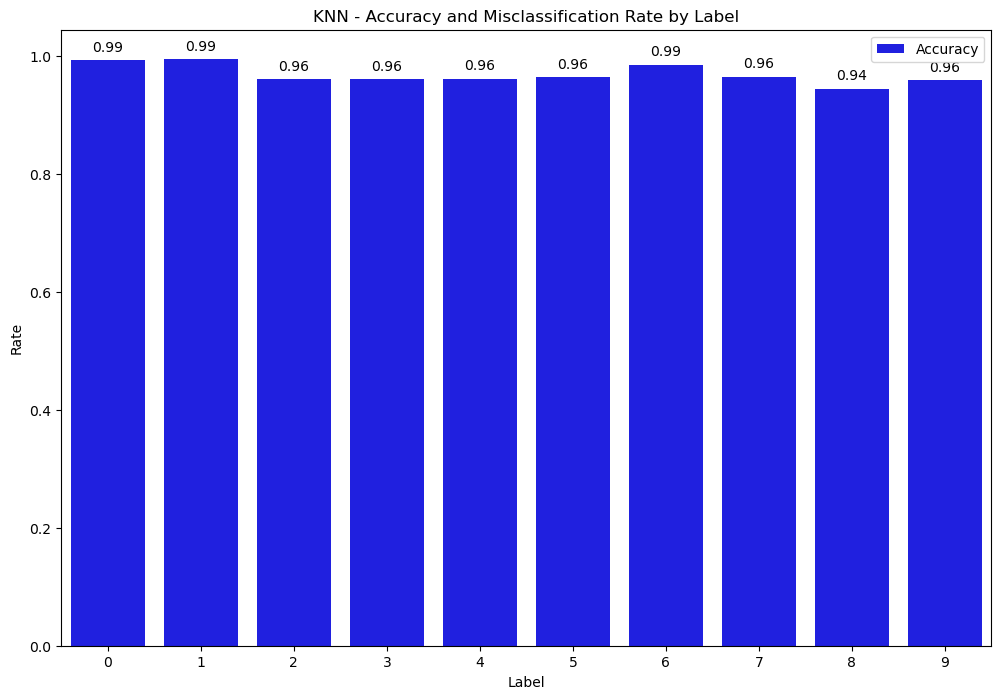

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Lấy dữ liệu mẫu bị phân loại sai
# misclassified_samples = newKNN.test_datas[newKNN.test_labels != newKNN.op_labels]

# # Tạo DataFrame với thông tin mẫu bị phân loại sai
# misclassified_data = pd.DataFrame({
#     'Actual': y_test[y_test != y_pred],
#     'Predicted': y_pred[y_test != y_pred],
#     'Index': y_test[y_test != y_pred].index
# })

# Tính ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)

# Tính tỉ lệ đúng và sai cho từng loại nhãn
accuracy_by_label = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
misclassification_by_label = 1 - accuracy_by_label

# Tạo DataFrame từ kết quả
results_df = pd.DataFrame({
    'Label': range(10),
    'Accuracy': accuracy_by_label,
    'Misclassification Rate': misclassification_by_label
})

# Vẽ biểu đồ
plt.figure(figsize=(12, 8))

# Biểu đồ tỉ lệ đúng
sns.barplot(x='Label', y='Accuracy', data=results_df, color='blue', label='Accuracy')
for i, value in enumerate(results_df['Accuracy']):
    plt.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

# Biểu đồ tỉ lệ sai
# sns.barplot(x='Label', y='Misclassification Rate', data=results_df, color='red', label='Misclassification Rate')
# for i, value in enumerate(results_df['Misclassification Rate']):
#     plt.text(i, value + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.title('KNN - Accuracy and Misclassification Rate by Label')
plt.xlabel('Label')
plt.ylabel('Rate')
plt.legend()
plt.show()


In [51]:
conf_matrix

array([[ 973,    1,    1,    0,    0,    1,    3,    1,    0,    0],
       [   0, 1129,    3,    0,    1,    1,    1,    0,    0,    0],
       [   7,    6,  992,    5,    1,    0,    2,   16,    3,    0],
       [   0,    1,    2,  970,    1,   19,    0,    7,    7,    3],
       [   0,    7,    0,    0,  944,    0,    3,    5,    1,   22],
       [   1,    1,    0,   12,    2,  860,    5,    1,    6,    4],
       [   4,    2,    0,    0,    3,    5,  944,    0,    0,    0],
       [   0,   14,    6,    2,    4,    0,    0,  992,    0,   10],
       [   6,    1,    3,   14,    5,   13,    3,    4,  920,    5],
       [   2,    5,    1,    6,   10,    5,    1,   11,    1,  967]],
      dtype=int64)

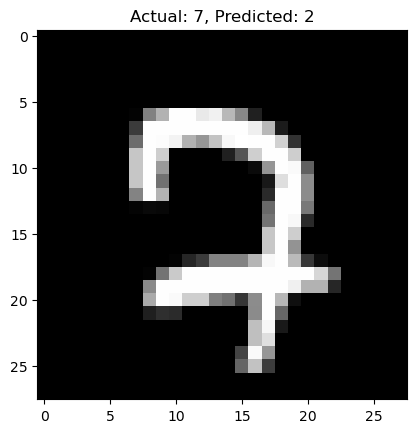

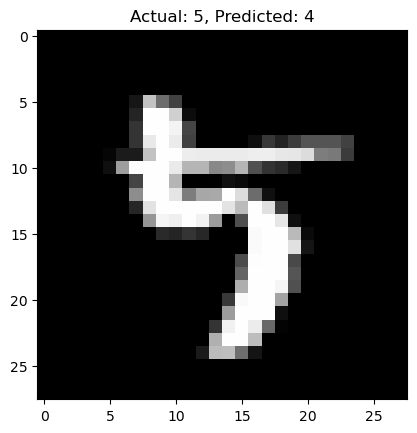

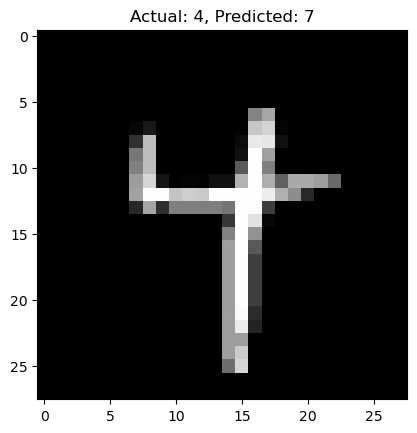

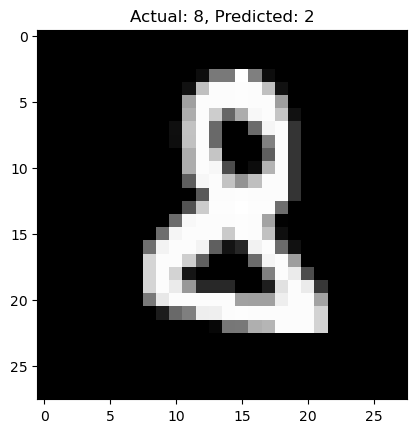

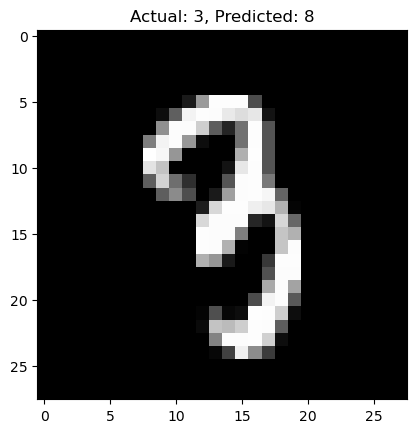

In [60]:
# import matplotlib.pyplot as plt
for index, row in misclassified_data.sample(5).iterrows():
    actual_label = row['Actual']
    predicted_label = row['Predicted']
    sample_index = row['Index']
    
    # Lấy vector dữ liệu của mẫu bị gán nhãn sai
    sample_data = X_test[sample_index].reshape(28, 28)
    
    # Biểu diễn hình ảnh
    plt.imshow(sample_data, cmap='gray')
    plt.title(f'Actual: {actual_label}, Predicted: {predicted_label}')
    plt.show()

In [59]:
newKNN.CM(1)


with k = 1
----------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|

tt =   100| PL =   0| PL =   1| PL =   2| PL =   3| PL =   4| PL =   5| PL =   6| PL =   7| PL =   8| PL =   9|

----------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|

 GT =   0 |      6  |      0  |      0  |      0  |      0  |      1  |      1  |      0  |      0  |      0  |

----------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|

 GT =   1 |      0  |     11  |      0  |      0  |      0  |      0  |      0  |      2  |      0  |      1  |

----------|---------|---------|---------|---------|---------|---------|---------|---------|---------|---------|

 GT =   2 |      0  |      0  |      3  |      1  |      0  |      1  |      1  |      0  |      2  |      0  |

----------|---------|---------|---------|---------|---------|---------|---------|----